In [20]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pickle

# Zustände und Aktionen
STATES = ["a", "b"]
ACTIONS = ["a", "b"]

# Belohnungen
REWARDS = {
    "a": {"a": 0, "b": 7},
    "b": {"a": -5, "b": 0}
}

# Übergangswahrscheinlichkeiten
TRANSITIONS = {
    "a": {"a": 0.1, "b": 0.9},
    "b": {"a": 0.9, "b": 0.1}
}


In [21]:
# Q-Tabelle initialisieren
Q = {state: {action: 0.0 for action in ACTIONS} for state in STATES}

### Training

In [32]:
# Hyperparameter
alpha = 0.1      # Lernrate
gamma = 0.9      # Diskontierungsfaktor
epsilon = 0.2    # Anfangs-Exploration

episodes = 100
max_steps = 10

reward_history = []

for ep in range(episodes):
    state = "a"
    total_reward = 0

    for step in range(max_steps):
        # Aktion wählen: entweder zufällig (explore) oder beste (exploit)
        if random.uniform(0, 1) < epsilon:
            action = random.choice(ACTIONS)
        else:
            action = max(Q[state], key=Q[state].get)

        # Übergang berechnen
        next_state = np.random.choice(
            list(TRANSITIONS[state].keys()),
            p=list(TRANSITIONS[state].values())
        )

        # Belohnung
        reward = REWARDS[state][next_state]
        total_reward += reward

        # Q-Wert aktualisieren
        old_value = Q[state][action]
        next_max = max(Q[next_state].values())

        Q[state][action] = old_value + alpha * (reward + gamma * next_max - old_value)

        state = next_state

    reward_history.append(total_reward)


In [33]:
# Beste Strategie (Policy) extrahieren
optimal_policy = {state: max(Q[state], key=Q[state].get) for state in STATES}

In [34]:
optimal_policy 

{'a': 'b', 'b': 'a'}

In [35]:
# Q-Tabelle speichern
with open("q_table.pkl", "wb") as f:
    pickle.dump(Q, f)


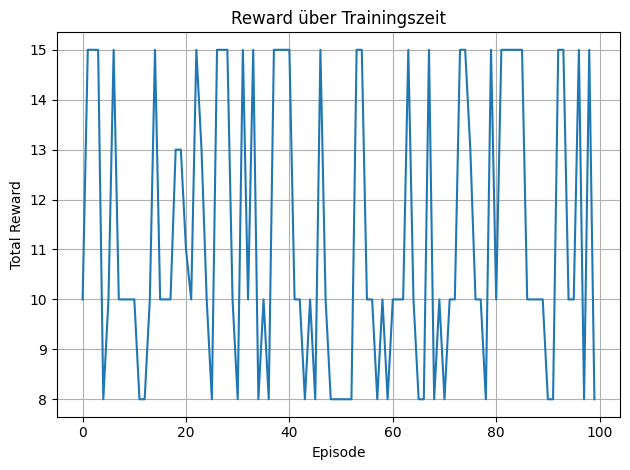

In [36]:
# Plotten der Belohnung über Episoden
plt.plot(reward_history)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Reward über Trainingszeit")
plt.grid(True)
plt.tight_layout()

In [37]:
plt_path = "reward_plot.png"
plt.savefig(plt_path)
plt.close()

In [38]:
# Rückgabe der Policy und Pfade
optimal_policy, plt_path, "q_table.pkl"

({'a': 'b', 'b': 'a'}, 'reward_plot.png', 'q_table.pkl')